# Monte Carlo and Finite Difference Methods in Pricing Financial Derivatives
#### Group Number: 15 | SID: 530473808

## Imports

In [111]:
import numpy as np
import math
import matplotlib.pyplot as plt

## 3. Monte Carlo Methods

### 3.1 Terminal Prices

#### Figure 1:
Terminal Price distribution of asset with initial price 100, volatility 0.25, risk-free rate 0.07 and
time to maturity 1. Note the right skew of the Black-Scholes PDF as a result of the risk-neutral model

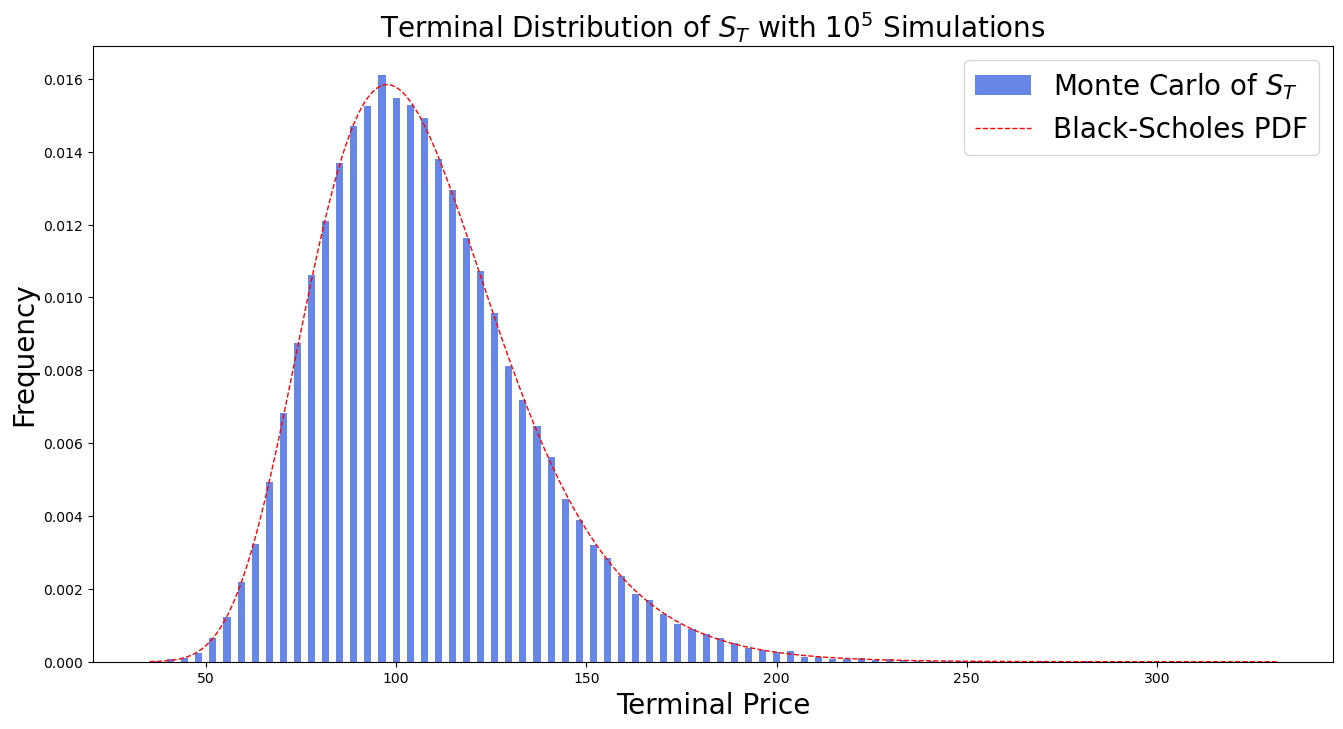

In [26]:
S0, K, r, sigma, T, N = 100, 100, 0.07, 0.25, 1.0, 100000
Z = np.random.normal(size=N)
ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)

fig, ax = plt.subplots(figsize=(16,8))
ax.hist(ST, bins=80, density=True, alpha=0.8, label="Monte Carlo of $S_T$", color = 'royalblue', rwidth = 0.5)

s = np.linspace(ST.min(), ST.max(), 800)
mu_ln = np.log(S0) + (r - 0.5*sigma**2)*T
sd_ln = sigma*np.sqrt(T)
pdf = (1/(s*sd_ln*np.sqrt(2*np.pi))) * np.exp(-(np.log(s)-mu_ln)**2/(2*sd_ln**2))

ax.plot(s, pdf, linestyle="--", label="Black-Scholes PDF", c = 'r', linewidth = 1)
ax.set_title("Terminal Distribution of $S_T$ with $10^5$ Simulations", fontsize = 20)
ax.set_xlabel("Terminal Price", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.legend(fontsize = 20)
fig.savefig('terminalDist.png')

### 3.2 Monte Carlo Variance Reduction Methods

#### Figure 2:
Convergence diagram of Monte Carlo method with no variance reduction for up to 1000 simulations.

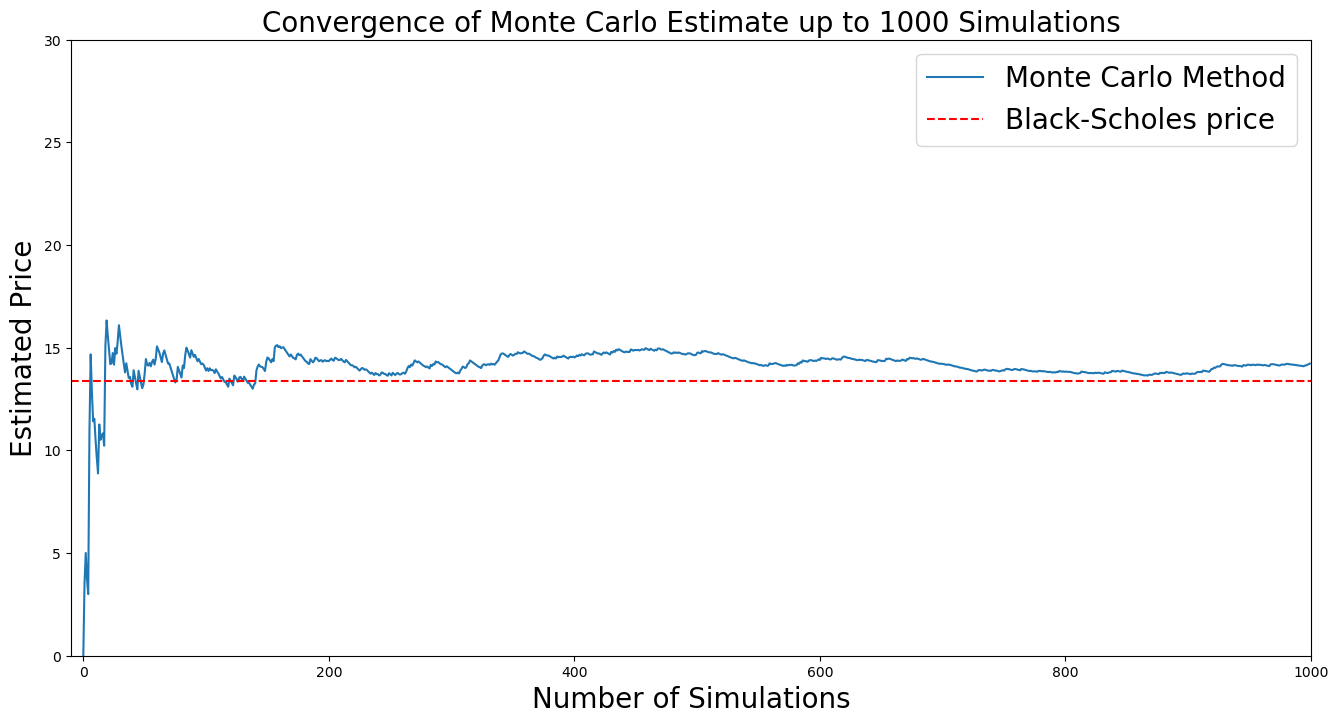

In [44]:
def V(S_0, K, T, r, sigma, N):
    arrX = np.random.normal(loc = 0, scale = 1, size = N)
    arr_S_T = S_0 * np.e ** ((r - 1/2 * sigma ** 2) * T + sigma * np.sqrt(T) * arrX)
    psi = np.maximum(arr_S_T - K, 0)
    E_psi = psi.sum()/N
    V = E_psi * np.e ** (-r * T)
    return V

S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
Z = np.random.normal(size=N)

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
running_price = np.cumsum(payoffs) / np.arange(1, N + 1)

true_price = V(100, 100, 1, 0.07, 0.25, 100000000)

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(running_price, label="Monte Carlo Method")
ax.axhline(true_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of Monte Carlo Estimate up to 1000 Simulations", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
ax.legend(fontsize = '20')
fig.savefig('basicConvergence.png')

### Figure 3:
Convergence diagram comparing Monte Carlo method with variance reduction method using
antithetical variables against basic Monte Carlo method

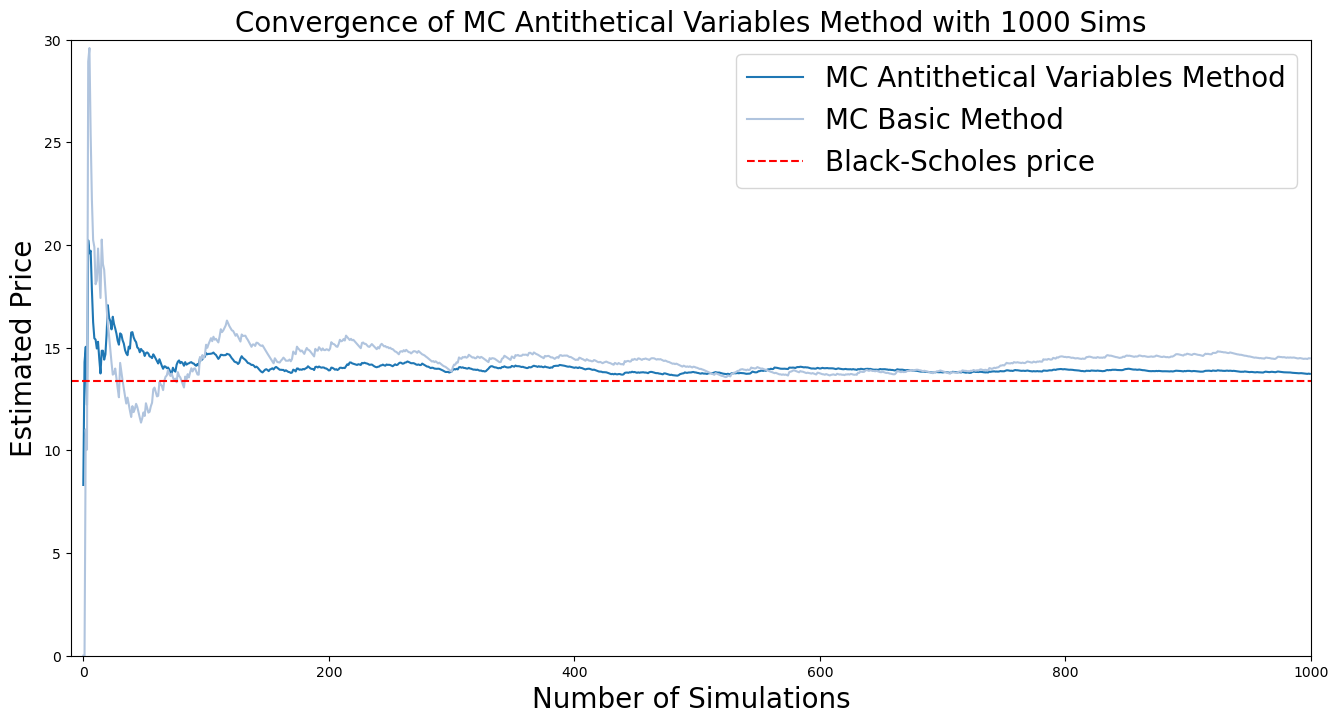

In [49]:
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
Z = np.random.normal(size=N)
antiZ = -Z

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
antiST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * antiZ)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
antipayoffs = np.exp(-r * T) * np.maximum(antiST - K, 0)
pairpayoffs = 0.5 * (payoffs + antipayoffs)
running_price = np.cumsum(pairpayoffs) / np.arange(1, N + 1)

STbasic = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffsbasic = np.exp(-r * T) * np.maximum(STbasic - K, 0)
running_pricebasic = np.cumsum(payoffsbasic) / np.arange(1, N + 1)

bs_price = V(100, 100, 1, 0.07, 0.25, 1000000)

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(running_price, label="MC Antithetical Variables Method")
ax.plot(running_pricebasic, label = 'MC Basic Method', c = 'lightsteelblue')
ax.axhline(bs_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of MC Antithetical Variables Method with 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.legend(fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
fig.savefig('antiConvergence.png')

### Figure 4:
Importance Sampling method of variance reduction and the basic Monte Carlo method. Note the faster convergence

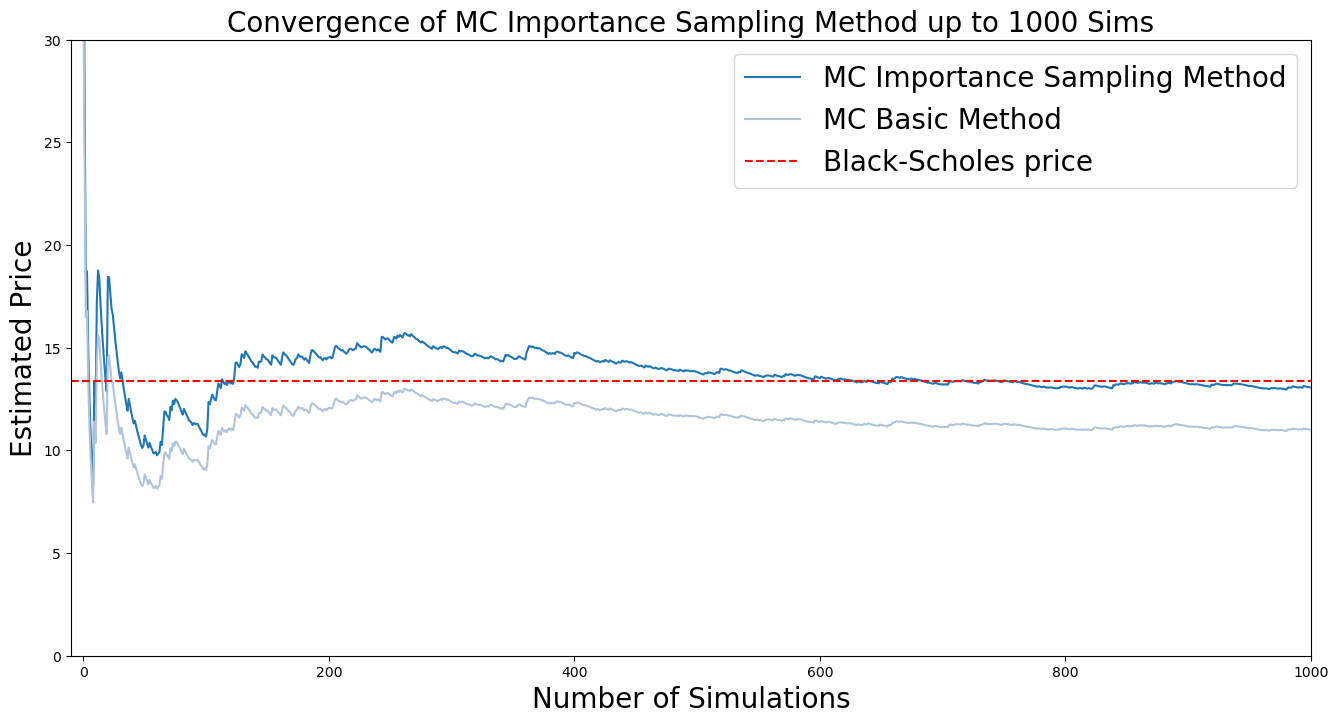

In [51]:
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
X_star = (np.log(K/S0) - (r - 1/2*sigma**2)*T)/sigma*np.sqrt(T)
beta = X_star
Z = np.random.normal(loc = beta, size=N)
weights = np.exp(-beta * Z - 0.5 * beta ** 2)

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)

weighted_pay = payoffs * weights
running_price_weighted = np.cumsum(weighted_pay) / np.arange(1, N + 1)
running_price = np.cumsum(payoffs) / np.arange(1, N + 1)

true_price = V(100, 100, 1, 0.07, 0.25, 100000000)

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(running_price_weighted, label="MC Importance Sampling Method")
ax.plot(running_price, label="MC Basic Method", c = 'lightsteelblue')
ax.axhline(true_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of MC Importance Sampling Method up to 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
ax.legend(fontsize = '20')
fig.savefig('ImportanceConvergence.png')

### Figure 5:
Monte Carlo using control variates method of variance reduction plotted with basic Monte Carlo
method. Convergence depends on correlation of h(x).

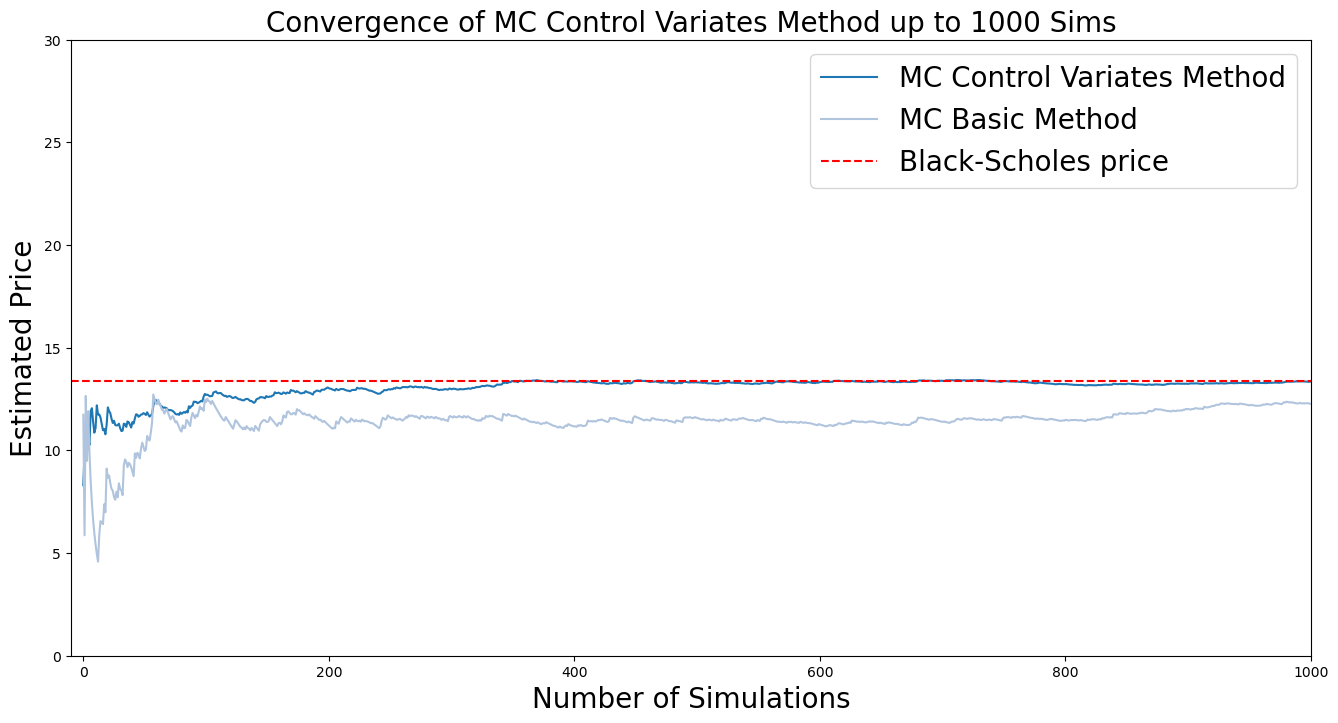

In [57]:
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
Z = np.random.normal(size=N)

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
f = np.exp(-r * T) * np.maximum(ST - K, 0)
h = np.exp(-r * T) * ST

cov_fh = np.cov(f, h, ddof=1)[0, 1]
var_h  = np.var(h, ddof=1)
if var_h == 0:
    beta  = 0
else:
    beta = cov_fh / var_h

g = f + beta * (S0 - h)
running_priceCV = np.cumsum(g) / np.arange(1, N + 1)
running_price = np.cumsum(f)/np.arange(1, N + 1)

true_price = V(100, 100, 1, 0.07, 0.25, 100000000)

fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(running_priceCV, label="MC Control Variates Method")
ax.plot(running_price, label="MC Basic Method", color = 'lightsteelblue')
ax.axhline(true_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of MC Control Variates Method up to 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
ax.legend(fontsize = '20')
fig.savefig('CVConvergence.png')

### Random Paths

#### Figure 6:
10 potential paths of an asset’s price given initial price 100, volatility 0.25, risk-free rate 0.07 and
time to expiry 1. Pay no attention to ’Euler Method’, we will go into that in the following section.

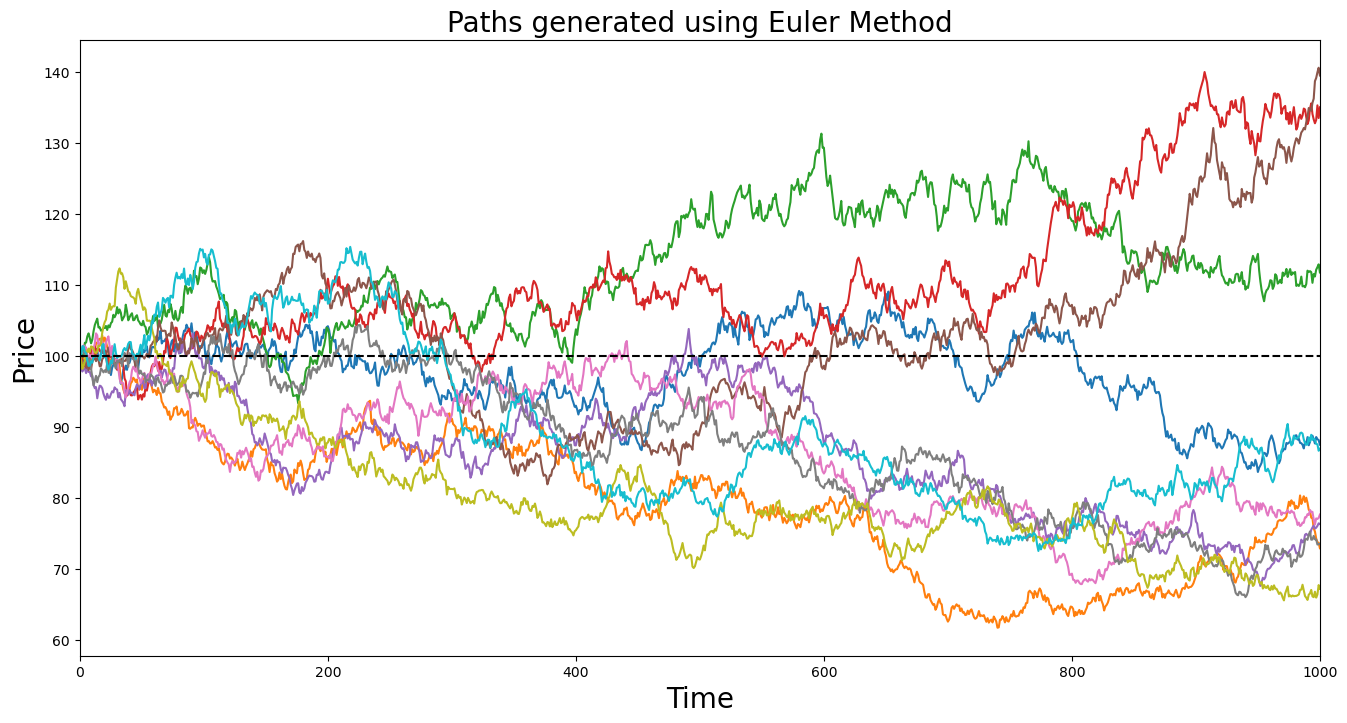

In [82]:
initialPrice, r, std, T, nt, npaths = 100, 0.07, 0.25, 1, 1000, 10
dt = T / nt
paths = []

for i in range(npaths):
    S = np.zeros(nt + 1)
    S[0] = initialPrice

    for t in range(nt):
        change = np.random.normal(loc=0, scale=1)
        S[t+1] = S[t] + r * S[t] * dt + std * S[t] * np.sqrt(dt) * change

    paths.append(S)

fig, ax = subplots(figsize=(16, 8))
for i in range(len(paths)):
    ax.plot(paths[i])

ax.set_title(f'Paths generated using Euler Method', fontsize='20')
ax.set_ylabel('Price', fontsize='20')
ax.set_xlabel('Time', fontsize='20')
ax.set_xlim(0, nt)
ax.axhline(initialPrice, color='k', ls='--')
fig.savefig('eulerplot.png')

#### Figure 7:
10 paths generated with Milstein method. The asset has initial price 100, volitity 0.25, risk-free
rate 0.07 and time to expiry 1.

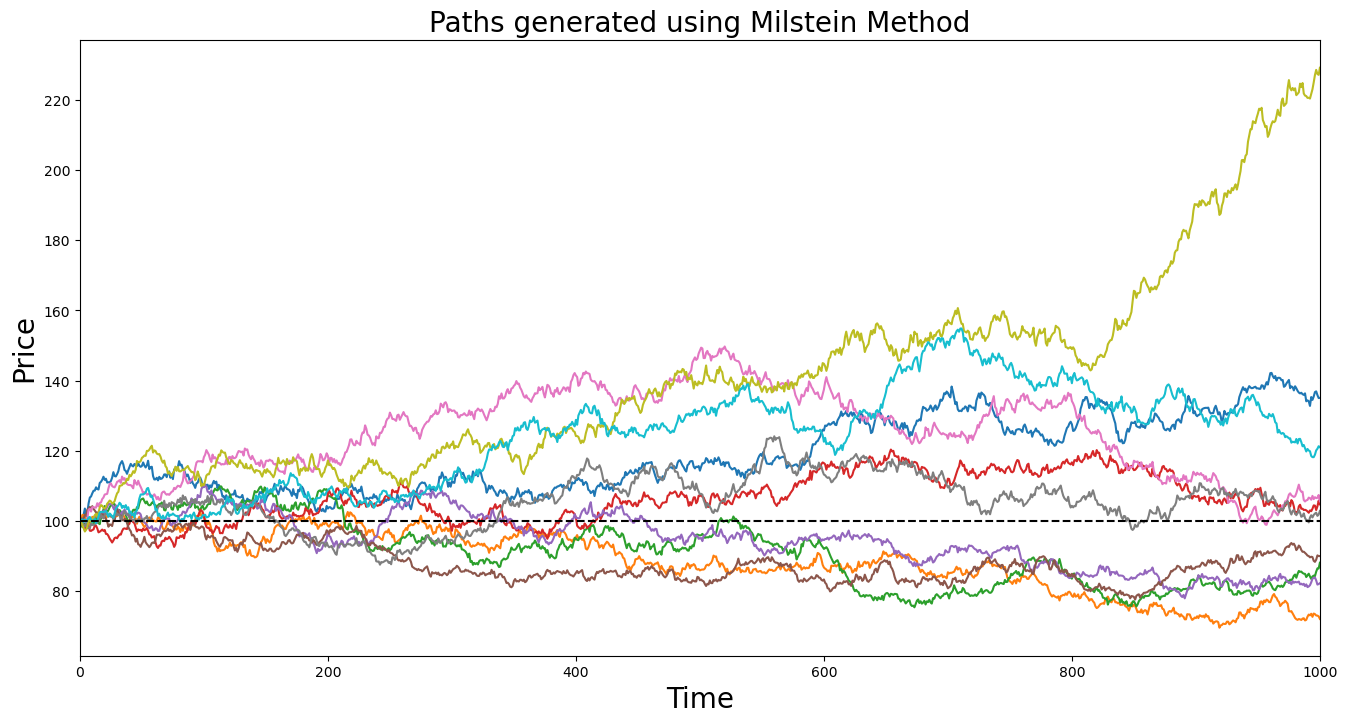

In [87]:
initialPrice, r, std, T, nt, npaths = 100, 0.07, 0.25, 1, 1000, 10
dt = T / nt
paths = []

for i in range(npaths):
    S = np.zeros(nt + 1)
    S[0] = initialPrice

    for t in range(nt):
        change = np.random.normal(loc=0, scale=1)
        S[t+1] = (S[t] + r * S[t] * dt + std * S[t] * np.sqrt(dt) * change + 0.5 * std**2 * dt * (change**2 - 1) * S[t])

    paths.append(S)
fig, ax = subplots(figsize=(16, 8))
for i in range(len(paths)):
    ax.plot(paths[i])

ax.set_title(f'Paths generated using Milstein Method', fontsize='20')
ax.set_ylabel('Price', fontsize='20')
ax.set_xlabel('Time', fontsize='20')
ax.set_xlim(0, nt)
ax.axhline(initialPrice, color='k', ls='--')
fig.savefig('milsteinplot.png')

## 4. Finite Difference Methods

### 4.1 Explicit Scheme

#### Figure 8:
Showing the calculated option value at different stock prices S. Note that when α > 1
2 , the
calculated value blows up at around the strike. α = 0.511 was chosen for better interpretability because of
scale

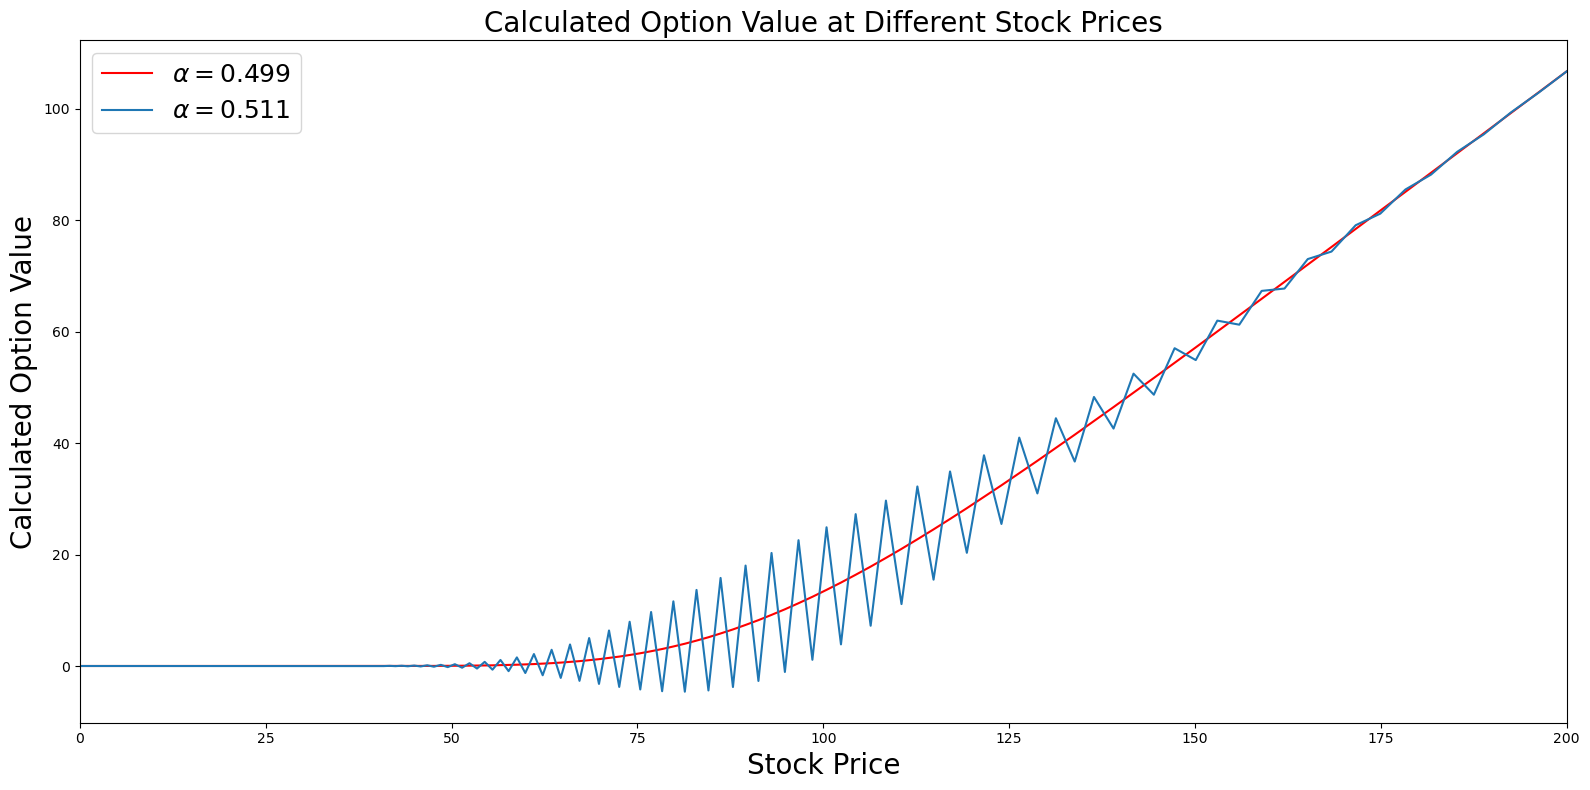

In [96]:
K, r, sigma, T = 100.0, 0.07, 0.25, 1.0
q = 2*r/(sigma**2)
A = (1-q)/2
B = -((1-q)**2)/4 - q
Smin, Smax, Nx = 1e-6, 200.0, 1000
x = np.linspace(np.log(Smin/K), np.log(Smax/K), Nx); dx = x[1]-x[0]
tau_max = 0.5*sigma**2*T
u0 = np.exp(-A*x)*np.maximum(np.exp(x)-1.0, 0.0)
S  = K*np.exp(x)

fig, ax = plt.subplots(figsize=(16, 8))

alpha_target = 0.5
u = u0.copy(); tau = 0.0
dtau = alpha_target*dx*dx; M = max(1, int(np.ceil(tau_max/dtau))); dtau = tau_max/M
alpha = dtau/(dx*dx)

for _ in range(M):
    u_new = u.copy()
    u_new[1:-1] = u[1:-1] + alpha*(u[2:] - 2*u[1:-1] + u[:-2])
    u_new[0]  = 0.0
    u_new[-1] = np.exp((1-A)*x[-1]-B*tau) - np.exp(-(2*r/(sigma**2))*tau - A*x[-1]-B*tau)
    u = u_new; tau += dtau
    if not np.isfinite(u).all() or np.max(np.abs(u))>1e6: 
        break
        
V = K*np.exp(A*x + B*tau)*u
ax.plot(np.concatenate(([0.0], S)), np.concatenate(([0.0], V)), label=rf'$\alpha={alpha:.3f}$', c = 'r')

alpha_target = 0.513
u = u0.copy(); tau = 0.0
dtau = alpha_target*dx*dx; M = max(1, int(np.ceil(tau_max/dtau))); dtau = tau_max/M
alpha = dtau/(dx*dx)

for _ in range(M):
    u_new = u.copy()
    u_new[1:-1] = u[1:-1] + alpha*(u[2:] - 2*u[1:-1] + u[:-2])
    u_new[0]  = 0.0
    u_new[-1] = np.exp((1-A)*x[-1]-B*tau) - np.exp(-(2*r/(sigma**2))*tau - A*x[-1]-B*tau)
    u = u_new; tau += dtau
    if not np.isfinite(u).all() or np.max(np.abs(u))>1e6: 
        break
        
V = K*np.exp(A*x + B*tau)*u
ax.plot(np.concatenate(([0.0], S)), np.concatenate(([0.0], V)), label=rf'$\alpha={alpha:.3f}$')

ax.set_xlim(0, 200)
ax.set_xlabel('Stock Price', fontsize=20)
ax.set_ylabel(r'Calculated Option Value', fontsize=20)
ax.set_title('Calculated Option Value at Different Stock Prices', fontsize=20)
ax.legend(fontsize=18)
fig.tight_layout()
fig.savefig('explicitstability.png')

### 4.2 Other Finite Difference Methods

#### Figure 9:
RMS error for implicit and Crank-Nicolson methods at different ∆t. Y axis has been scaled for
interpretability.

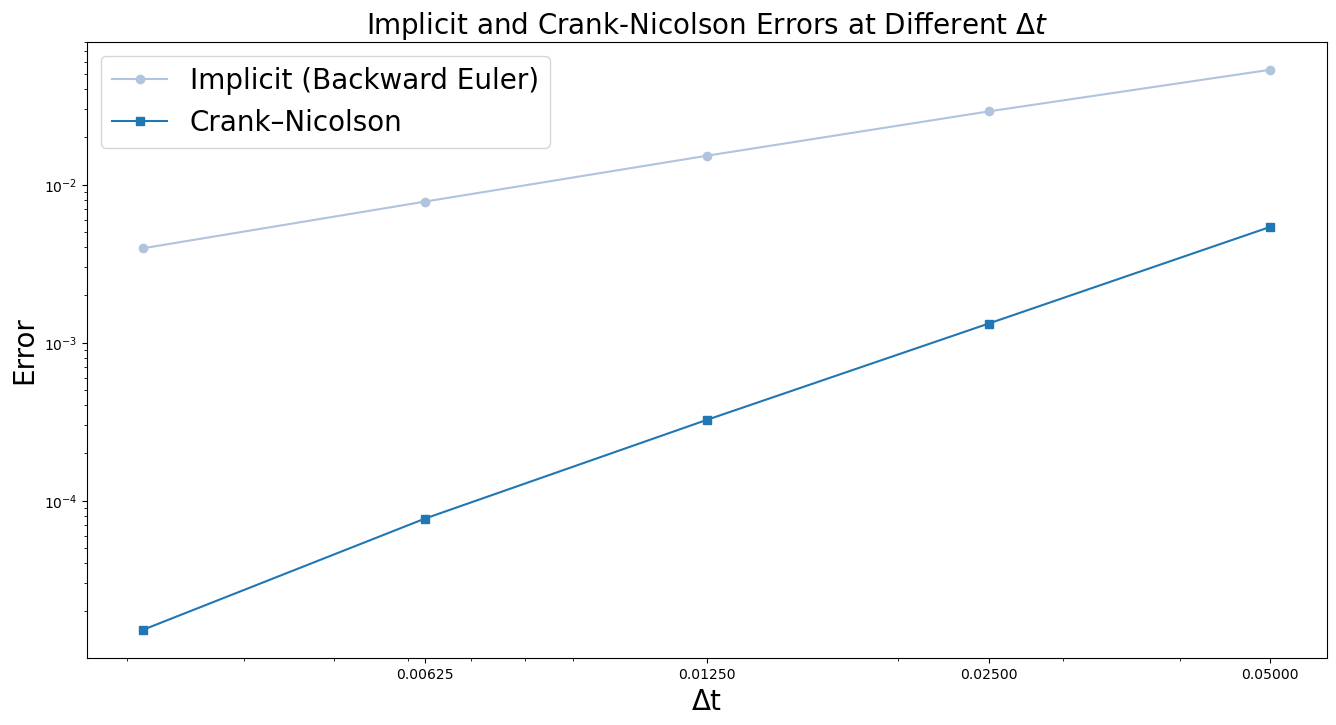

In [102]:
alpha = 1.0
L = 1.0
Nx = 200
dx = L / Nx
x = np.linspace(0, L, Nx + 1)

T = 0.1
u0 = np.sin(np.pi * x)

def exact_solution(x, t):
    return np.exp(-alpha * np.pi**2 * t) * np.sin(np.pi * x)

dts = [0.05, 0.025, 0.0125, 0.00625, 0.003125]
errors_imp = []
errors_cn = []

for dt in dts:
    r = alpha * dt / dx**2
    u_imp = u0.copy()
    u_cn = u0.copy()
    
    a_imp = -r * np.ones(Nx - 1)
    b_imp = (1 + 2*r) * np.ones(Nx - 1)
    c_imp = -r * np.ones(Nx - 1)

    a_cn = -(r/2) * np.ones(Nx - 1)
    b_cn = (1 + r) * np.ones(Nx - 1)
    c_cn = -(r/2) * np.ones(Nx - 1)

    n_steps = int(T / dt)

    for _ in range(n_steps):
        rhs_imp = u_imp[1:-1].copy()
        cp = np.zeros(Nx - 2)
        dp = np.zeros(Nx - 1)
        cp[0] = c_imp[0] / b_imp[0]
        dp[0] = rhs_imp[0] / b_imp[0]
        for i in range(1, Nx - 2):
            denom = b_imp[i] - a_imp[i] * cp[i - 1]
            cp[i] = c_imp[i] / denom
            dp[i] = (rhs_imp[i] - a_imp[i] * dp[i - 1]) / denom
        dp[-1] = (rhs_imp[-1] - a_imp[-1] * dp[-2]) / (b_imp[-1] - a_imp[-1] * cp[-2])
        u_new = np.zeros(Nx - 1)
        u_new[-1] = dp[-1]
        for i in range(Nx - 3, -1, -1):
            u_new[i] = dp[i] - cp[i] * u_new[i + 1]
        u_imp[1:-1] = u_new

        rhs_cn = (r/2) * u_cn[:-2] + (1 - r) * u_cn[1:-1] + (r/2) * u_cn[2:]
        cp = np.zeros(Nx - 2)
        dp = np.zeros(Nx - 1)
        cp[0] = c_cn[0] / b_cn[0]
        dp[0] = rhs_cn[0] / b_cn[0]
        for i in range(1, Nx - 2):
            denom = b_cn[i] - a_cn[i] * cp[i - 1]
            cp[i] = c_cn[i] / denom
            dp[i] = (rhs_cn[i] - a_cn[i] * dp[i - 1]) / denom
        dp[-1] = (rhs_cn[-1] - a_cn[-1] * dp[-2]) / (b_cn[-1] - a_cn[-1] * cp[-2])
        # backward sub
        u_new = np.zeros(Nx - 1)
        u_new[-1] = dp[-1]
        for i in range(Nx - 3, -1, -1):
            u_new[i] = dp[i] - cp[i] * u_new[i + 1]
        u_cn[1:-1] = u_new

    u_exact = exact_solution(x, T)
    err_imp = np.sqrt(np.mean((u_imp - u_exact)**2))
    err_cn = np.sqrt(np.mean((u_cn - u_exact)**2))
    errors_imp.append(err_imp)
    errors_cn.append(err_cn)

fig, ax = plt.subplots(figsize=(16, 8))
ax.loglog(dts, errors_imp, 'o-', label='Implicit (Backward Euler)', c = 'lightsteelblue')
ax.loglog(dts, errors_cn, 's-', label='Crank–Nicolson')
ax.set_xlabel('Δt', fontsize = 20)
ax.set_ylabel('Error',fontsize = 20)
ax.set_title('Implicit and Crank-Nicolson Errors at Different $Δt$', fontsize = 20)
ax.legend(fontsize = 20)
rounded_dts = [0.05, 0.025, 0.0125, 0.00625]
ax.set_xticks(rounded_dts)
ax.set_xticklabels([str(dt) for dt in rounded_dts])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')
fig.savefig('implicitcnaccuracy.png')
plt.show()